# 0. Setup Paths

In [4]:
import os

In [5]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnetv2' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [6]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [7]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [8]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [10]:
if os.name=='nt':
    !pip install wget
    import wget

In [11]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [12]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

zsh:1: command not found: apt-get
Processing /Users/benoit/code/bakerley/computervision/diving/Tensorflow/models/research


  Using cached numpy-1.19.5-cp38-cp38-macosx_10_9_x86_64.whl (15.6 MB)


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1644003 sha256=d8308086803bca0db8834791a92143617600200166723419122a4b2193677421
  Stored in directory: /private/var/folders/n_/h2zv33m170v5ctjs73fwpdth0000gn/T/pip-ephem-wheel-cache-zlxqkqdw/wheels/a8/28/2a/6ce7d54c9ac6f41364662c787a0cf78509805e3c38924d6f2d
Successfully built object-detection
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.9 requires numpy==1.19.1, but you have numpy 1.19.5 which is incompatible.
You should co

In [13]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.6: /Users/benoit/.pyenv/versions/lewagon/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-05-03 09:34:22.964065: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-03 09:34:22.964250: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model): 0.94s
I0503 09:34:23.302225 4663033344 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_create_center_net_model): 0.94s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model_from_keypoints
INFO:tensorflow:time(__main_

I0503 09:34:25.632093 4663033344 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b1
I0503 09:34:25.632245 4663033344 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 88
I0503 09:34:25.632339 4663033344 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 4
I0503 09:34:25.635967 4663033344 efficientnet_model.py:147] round_filter input=32 output=32
I0503 09:34:25.647503 4663033344 efficientnet_model.py:147] round_filter input=32 output=32
I0503 09:34:25.647600 4663033344 efficientnet_model.py:147] round_filter input=16 output=16
I0503 09:34:25.748124 4663033344 efficientnet_model.py:147] round_filter input=16 output=16
I0503 09:34:25.748234 4663033344 efficientnet_model.py:147] round_filter input=24 output=24
I0503 09:34:25.935088 4663033344 efficientnet_model.py:147] round_filter input=24 output=24
I0503 09:34:25.935195 4663033344 efficientnet_model.py:147] round_filt

I0503 09:34:28.962437 4663033344 efficientnet_model.py:147] round_filter input=24 output=32
I0503 09:34:28.962552 4663033344 efficientnet_model.py:147] round_filter input=40 output=48
I0503 09:34:29.140904 4663033344 efficientnet_model.py:147] round_filter input=40 output=48
I0503 09:34:29.141007 4663033344 efficientnet_model.py:147] round_filter input=80 output=96
I0503 09:34:29.590869 4663033344 efficientnet_model.py:147] round_filter input=80 output=96
I0503 09:34:29.590973 4663033344 efficientnet_model.py:147] round_filter input=112 output=136
I0503 09:34:29.867781 4663033344 efficientnet_model.py:147] round_filter input=112 output=136
I0503 09:34:29.867888 4663033344 efficientnet_model.py:147] round_filter input=192 output=232
I0503 09:34:30.249655 4663033344 efficientnet_model.py:147] round_filter input=192 output=232
I0503 09:34:30.249768 4663033344 efficientnet_model.py:147] round_filter input=320 output=384
I0503 09:34:30.382458 4663033344 efficientnet_model.py:147] round_filt

I0503 09:34:34.958418 4663033344 efficientnet_model.py:147] round_filter input=1280 output=2048
I0503 09:34:34.995937 4663033344 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.6, depth_coefficient=2.2, resolution=456, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_models_from_config): 18.49s
I0503 09:34:42.851662 4663033344 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_create_ssd_models_from_config): 18.49s
[       OK ] ModelBuilderTF2Test.test_create_ssd_models_from_config
[ RUN      ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
I0503 09:34:42.860703 4663033344 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
[ RUN      ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
I0503 09:34:42.862391 4663033344 test_util.py:2075] time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
[       OK ]

In [14]:
!pip install tensorflow --upgrade

You should consider upgrading via the '/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [15]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.15.8
Uninstalling protobuf-3.15.8:
  Successfully uninstalled protobuf-3.15.8
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
  Using cached protobuf-3.15.8-cp38-cp38-macosx_10_9_x86_64.whl (1.0 MB)
  Using cached matplotlib-3.2.0-cp38-cp38-macosx_10_9_x86_64.whl (12.4 MB)
You should consider upgrading via the '/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [16]:
import object_detection

In [17]:
!pip list

Package                           Version
--------------------------------- -----------
absl-py                           0.11.0
aiobotocore                       1.2.1
aiohttp                           3.7.3
aioitertools                      0.7.1
alembic                           1.4.1
altair                            4.1.0
anyio                             2.0.2
apache-beam                       2.28.0
appdirs                           1.4.4
appnope                           0.1.2
argon2-cffi                       20.1.0
args                              0.1.0
astor                             0.8.1
astroid                           2.4.2
astunparse                        1.6.3
async-generator                   1.10
async-timeout                     3.0.1
attrs                             20.3.0
Automat                           20.2.0
autopep8                          1.5.4
avro-python3                      1.9.2.1
Babel                             2.9.0
backcall                  

You should consider upgrading via the '/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [18]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-05-03 09:34:57--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.1.16
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.1.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  10.9MB/s    in 1.8s    

2021-05-03 09:34:59 (10.9 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-

# 2. Create Label Map

In [19]:
labels = [{'name':'down', 'id':1}, {'name':'up', 'id':2}, {'name':'noair', 'id':3}, {'name':'reserve', 'id':4}, {'name':'stop', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [8]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [9]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow/scripts'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [16]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [17]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [10]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [11]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [12]:
config

{'model': ssd {
   num_classes: 5
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [13]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [14]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [23]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [24]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [25]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [23]:
!pip uninstall numpy -y
!pip install numpy==1.19.2

Found existing installation: numpy 1.20.2
Uninstalling numpy-1.20.2:
  Successfully uninstalled numpy-1.20.2
  Using cached numpy-1.19.2-cp38-cp38-macosx_10_9_x86_64.whl (15.3 MB)


In [29]:
!pip install pycocotools==2.0.0

     |████████████████████████████████| 1.5 MB 5.4 MB/s eta 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.0-cp38-cp38-macosx_11_0_x86_64.whl size=89310 sha256=b2eedd310c606df0685d7c1c493b11b488cfff1f54844e9d5dda33ed221eccb3
  Stored in directory: /Users/benoit/Library/Caches/pip/wheels/6d/64/41/377caa9952a6054d9525554c231bdd66d0d612aa991d2f3a48
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


In [26]:
!export CUDA_VISIBLE_DEVICES=-1

In [27]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=2000


In [32]:
!{command}

2021-04-09 16:36:57.196954: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-09 16:36:57.197198: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0409 16:36:57.198184 4552359424 cross_device_ops.py:1321] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0409 16:36:57.198328 4552359424 mirrored_strategy.py:350] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 3000
I0409 16:36:57.201642 4552359424 config_util.py:552] Maybe overwriting train_steps:

Instructions for updating:
Use fn_output_signature instead
W0409 16:37:28.000672 123145579716608 deprecation.py:531] From /Users/benoit/.pyenv/versions/diving/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py:605: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Use fn_output_signature instead
^C


# 7. Evaluate the Model

In [ ]:
!pip install numpy==1.17.5

In [28]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [29]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [15]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [16]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [18]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [38]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '20210410_094839.jpg')

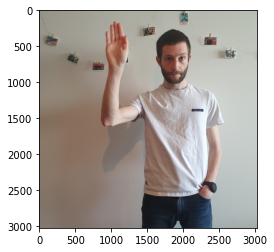

In [39]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [37]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.1.48
Uninstalling opencv-python-headless-4.5.1.48:
  Successfully uninstalled opencv-python-headless-4.5.1.48


In [40]:
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.5.1.48-cp38-cp38-macosx_10_13_x86_64.whl (40.3 MB)


In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [20]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [21]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [22]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnetv2/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnetv2 --output_directory=Tensorflow/workspace/models/my_ssd_mobnetv2/export


In [ ]:
!{command}

# 11. Conversion to TFJS

In [23]:
!pip install tensorflowjs

     |████████████████████████████████| 63 kB 2.9 MB/s eta 0:00:011
     |████████████████████████████████| 103 kB 10.1 MB/s eta 0:00:01
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0
You should consider upgrading via the '/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [24]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [25]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [26]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnetv2/pipeline.config --trained_checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnetv2 --output_directory=Tensorflow/workspace/models/my_ssd_mobnetv2/tfliteexport


In [27]:
!{command}

Traceback (most recent call last):
  File "Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py", line 161, in <module>
    app.run(main)
  File "/Users/benoit/.pyenv/versions/lewagon/lib/python3.8/site-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/Users/benoit/.pyenv/versions/lewagon/lib/python3.8/site-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py", line 149, in main
    text_format.Parse(f.read(), pipeline_config)
  File "/Users/benoit/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/lib/io/file_io.py", line 117, in read
    self._preread_check()
  File "/Users/benoit/.pyenv/versions/lewagon/lib/python3.8/site-packages/tensorflow/python/lib/io/file_io.py", line 79, in _preread_check
    self._read_buf = _pywrap_file_io.BufferedInputStream(
tensorflow.python.framework.errors_impl.NotFoundError: Tensorflow/workspace/

In [28]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [29]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [30]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspace/models/my_ssd_mobnetv2/tfliteexport/saved_model --output_file=Tensorflow/workspace/models/my_ssd_mobnetv2/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [31]:
!{command}

Traceback (most recent call last):
  File "/Users/benoit/.pyenv/versions/lewagon/bin/tflite_convert", line 8, in <module>
    sys.exit(main())
  File "/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/lite/python/tflite_convert.py", line 646, in main
    app.run(main=run_main, argv=sys.argv[:1])
  File "/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/Users/benoit/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/tensorflow/lite/python/tflite_convert.py", line 629, in run_main
    _convert_tf2

# 13. Zip and Export Models 

In [32]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}